In [41]:
# Import the modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

%matplotlib inline

In [42]:
# Import data for homeless policy and homeless population in two csv files
policy_data_to_load = Path("2021-HNH-State-Crim-Supplement_Edited.csv")
population_data_to_load = Path("Homeless Population by State.csv")

# Read School and Student csv files and store in Pandas dataframes
homeless_laws = pd.read_csv(policy_data_to_load)
homeless_population = pd.read_csv(population_data_to_load)

# Use pd.merge method to combine the dataframe into a single set using outer join 
homeless_merged = pd.merge(homeless_laws, homeless_population, how="outer", on=["State", "State"])
homeless_merged.head()

,State,Sleeping in public state- wide,Sleeping in particular public places,Camping in public state- wide,Camping in particular public places,Sitting/lying in particular public places,"Lodging, living, or sleeping in vehicles (or parking a vehicle used as a lodging / living accom- modation)",Loitering / Loafing / Vagrancy state-wide,Loitering / Loafing in particular public places,Standing in Roadway,...,Panhandling in particular public places,Panhandling in particular ways,Restrictiveness Score,Total,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,False,False,False,False,False,False,True,True,True,...,True,True,6,3752,7.4,539,1270,2482,169,308
1,Alaska,False,False,False,True,False,False,False,False,False,...,False,False,1,2320,31.7,576,560,1760,186,134
2,Arizona,False,False,False,True,False,False,True,True,True,...,True,True,6,13553,18.6,2476,2846,10707,917,857
3,Arkansas,False,False,False,False,False,False,True,True,True,...,True,False,5,2459,8.1,376,328,2131,251,92
4,California,False,False,True,True,True,False,False,True,True,...,False,False,5,171521,43.7,57760,25538,145983,9590,10395


In [43]:
# Rename columns to be more intelligible to readers

homeless_merged = homeless_merged.rename(columns={'Sleeping in public state- wide':'Sleep in public statewide',
                                                'Sleeping in particular public places':'Sleep in specific public places',
                                                'Camping in public state- wide':'Camp in public statewide',
                                                 'Camping in particular public places': 'Camp in specific public places',
                                                 'Sitting/lying in particular public places':'Lying in specific public places',
                                                 'Lodging, living, or sleeping in vehicles (or parking a vehicle used as a lodging / living accom- modation)': 'Sleep/live in vehicle',
                                                 'Loitering / Loafing / Vagrancy state-wide' : 'Loitering statewide',
                                                 'Loitering / Loafing in particular public places': 'Loiter in specific public places',
                                                 'Standing in Roadway':'Standing in road',
                                                 'Panhandling in public places state- wide':'Panhandling statewide',
                                                 'Panhandling in particular public places':'Panhandling in specific public places',
                                                 'Total':'TotalPopulation'})

# Print first five rows of dataframe with renamed columns
homeless_merged.head()

,State,Sleep in public statewide,Sleep in specific public places,Camp in public statewide,Camp in specific public places,Lying in specific public places,Sleep/live in vehicle,Loitering statewide,Loiter in specific public places,Standing in road,...,Panhandling in specific public places,Panhandling in particular ways,Restrictiveness Score,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans
0,Alabama,False,False,False,False,False,False,True,True,True,...,True,True,6,3752,7.4,539,1270,2482,169,308
1,Alaska,False,False,False,True,False,False,False,False,False,...,False,False,1,2320,31.7,576,560,1760,186,134
2,Arizona,False,False,False,True,False,False,True,True,True,...,True,True,6,13553,18.6,2476,2846,10707,917,857
3,Arkansas,False,False,False,False,False,False,True,True,True,...,True,False,5,2459,8.1,376,328,2131,251,92
4,California,False,False,True,True,True,False,False,True,True,...,False,False,5,171521,43.7,57760,25538,145983,9590,10395


In [44]:
# Create ChronicPer10k column to measure chronic homeless population per 10,000 residents

homeless_merged['ChronicPer10k'] = \
    homeless_merged['Per10kResidents'] * homeless_merged['ChronicallyHomeless'] / homeless_merged['TotalPopulation']
homeless_merged.head()

,State,Sleep in public statewide,Sleep in specific public places,Camp in public statewide,Camp in specific public places,Lying in specific public places,Sleep/live in vehicle,Loitering statewide,Loiter in specific public places,Standing in road,...,Panhandling in particular ways,Restrictiveness Score,TotalPopulation,Per10kResidents,ChronicallyHomeless,PeopleInFamilyUnits,SoloIndividuals,UnaccompaniedYouths,Veterans,ChronicPer10k
0,Alabama,False,False,False,False,False,False,True,True,True,...,True,6,3752,7.4,539,1270,2482,169,308,1.063060
1,Alaska,False,False,False,True,False,False,False,False,False,...,False,1,2320,31.7,576,560,1760,186,134,7.870345
2,Arizona,False,False,False,True,False,False,True,True,True,...,True,6,13553,18.6,2476,2846,10707,917,857,3.398037
3,Arkansas,False,False,False,False,False,False,True,True,True,...,False,5,2459,8.1,376,328,2131,251,92,1.238552
4,California,False,False,True,True,True,False,False,True,True,...,False,5,171521,43.7,57760,25538,145983,9590,10395,14.716052


In [45]:
# Use .loc method to get pertinent columns we will need to do statistical hypothesis testing on

homeless_reduced = homeless_merged.loc[:, ['State','Restrictiveness Score','TotalPopulation','Per10kResidents','ChronicallyHomeless','ChronicPer10k']]
homeless_reduced.head(10)

,State,Restrictiveness Score,TotalPopulation,Per10kResidents,ChronicallyHomeless,ChronicPer10k
0,Alabama,6,3752,7.4,539,1.063060
1,Alaska,1,2320,31.7,576,7.870345
2,Arizona,6,13553,18.6,2476,3.398037
3,Arkansas,5,2459,8.1,376,1.238552
4,California,5,171521,43.7,57760,14.716052
5,Colorado,2,10397,17.9,3466,5.967241
6,Connecticut,3,2930,8.1,117,0.323447
7,Delaware,4,2369,23.6,196,1.952554
8,District of Columbia,2,4410,65.8,1257,18.755238
9,Florida,4,25959,11.9,4233,1.940472


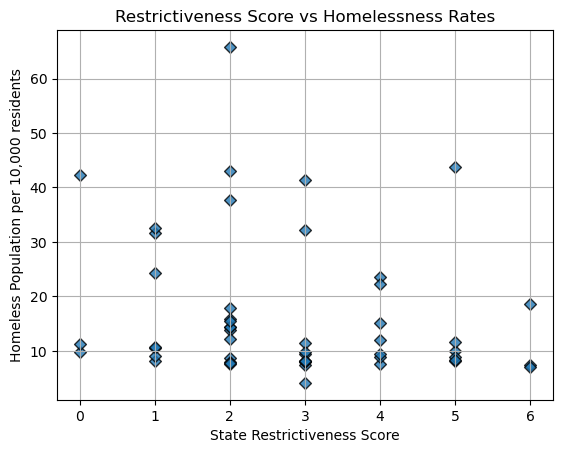

In [46]:
# Correlate state restrictiveness scores with rates of homelessness per 10K residents in each state

plt.scatter(     
    homeless_reduced["Restrictiveness Score"],
    homeless_reduced["Per10kResidents"],
    edgecolor="black",
    linewidths=1,
    marker="D", 
    alpha=0.8,

)

# Augment
plt.title("Restrictiveness Score vs Homelessness Rates")
plt.xlabel("State Restrictiveness Score")
plt.ylabel("Homeless Population per 10,000 residents")
plt.grid(True)


# Show plot
plt.show()

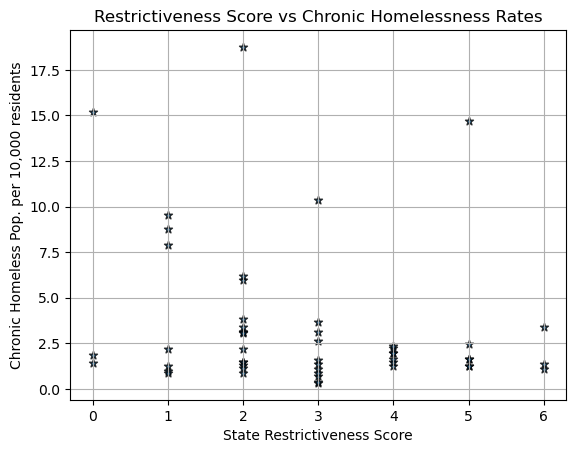

In [47]:
plt.scatter(     
    homeless_reduced["Restrictiveness Score"],
    homeless_reduced["ChronicPer10k"],
    edgecolor="black",
    linewidths=1,
    marker="*", 
    alpha=0.8,
    #label="Cities"
)

# Augment
plt.title("Restrictiveness Score vs Chronic Homelessness Rates")
plt.xlabel("State Restrictiveness Score")
plt.ylabel("Chronic Homeless Pop. per 10,000 residents")
plt.grid(True)


# Show plot
plt.show()

In [48]:
# Regression analysis for each of the pairs below.

# Define a function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, sterr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("State Restrictiveness Score")
    plt.ylabel(title)
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")
    print(f"The p value is: {pvalue}")
    plt.grid(True)
    plt.show()

The r-squared value is: 0.037553417882135974
The r value is: -0.1937870426064033
The p value is: 0.17302000646945218


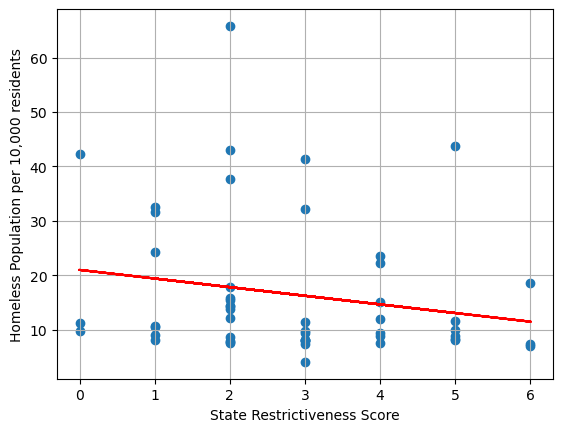

In [49]:
# Linear regression on Per10Residents Homeless compared to Restrictiveness Score
x_values = homeless_reduced["Restrictiveness Score"]
y_values = homeless_reduced["Per10kResidents"]
plot_linear_regression(x_values, y_values, "Homeless Population per 10,000 residents", (6,-10))

The r-squared value is: 0.0457813766117389
The r value is: -0.21396583047706216
The p value is: 0.1316412883612436


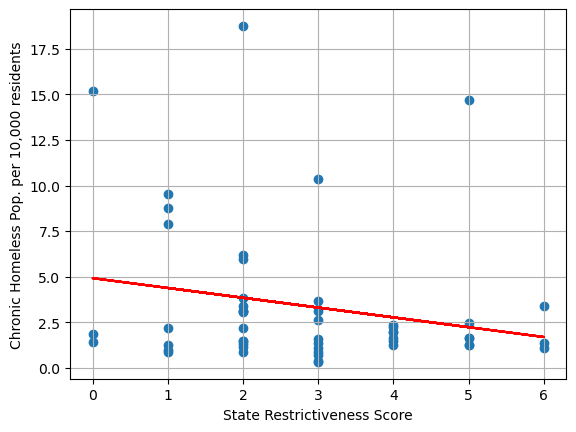

In [50]:
# Linear regression on Chronic Per10Residents Homeless compared to Restrictiveness Score
x_values = homeless_reduced["Restrictiveness Score"]
y_values = homeless_reduced["ChronicPer10k"]
plot_linear_regression(x_values, y_values, "Chronic Homeless Pop. per 10,000 residents", (6,-10))